<a href="https://colab.research.google.com/github/FRM96/TFG/blob/main/learning_about_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Layers


In [12]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

In [13]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [4]:
'''
The convolution is performed by multiplying the filter pixelwise with the
portion of the image and summing the result. The output is more positive when 
the portion of the image closely matches the filter and more negative when
the portion ofthe image is the inverse of the filter. 

If we move the filter across the entire image, we obtain a new array that picks 
out a particular feature of the input, depending on the values in the filter.
'''

input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same',
)(input_layer)


'''
@param strides: the step size used by the layer to move he filters across the 
input. Increasing the stride reduces the size of the output tensor. With 
strides = 2, the heigh and width of the output tensor will be half the size of 
the input tensor. The number of channels will increasing (@param filter)

@param padding = "same": input parameer pads the imput data with zeros so that
the output size from the layer is exactly the same as the input size when 
strides = 1.

@param kernel_size: the filter size.

'''


conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)


In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


<img src='https://drive.google.com/uc?id=1GTsa5Nk7gUlafALH79-rj-eyYQxiYuL3'>


# Batch Normalization and Dropout Layers


In [ ]:
'''
One common problem when training a deep neural network is ensuring that the
weights of the network remain within a reasonable range of values. If they 
start to become too large, this is a sign that our network is suffering from 
what is know as the exploding gradient problem. As errors are propagated backward
through the network, the calculation of the gradient in the earlier layer can 
sometimes grow exponentially large, causing wild fluctuations in the weight 
values. If our loss function starts to return NaN, chances are that our weights
have grown large enought to cause an overflow error. We scale input data into a
neural network to avoid this. From 0-255 values, to between -1 and 1. 

Batch normalization is a solution that drastically reduces this problem. The 
solution is susprisingly simple. A batch normalization layer calculates the mean
and the standard deviation of each of its input channel across the batch and 
normalizes by substracting the mean and dividing by the standard deviation. 
There are two learned params for each channel, the scale (gamma) and shift (beta).
The output is simply the normalized input, scaled by gamma and shifted by beta. 

In Keras, the Batch Normalization layer implements the normalizatrion 
functionality: BatchNormalization(momentum = 0.9) where momenum is the weight
given to the previous value when calculaing the moving average and moving 
standard deviation.

Any successful machine learning algorithm must ensure that it generalizes to
unseen data, rather than simply remenbering the training dataset. If an algorithm
performs well on the training dataset, but not the test dataset, we say that it
is suffering from overfitting. To counteract his problem, we use regularization
techniques, which ensure that the model is penalized if it starts to overfit. 

The most common regularize algorithm is by using dropouts layers. 
During the training, each dropout layer chooses a random set of units from the 
preceding layer and sets their output to zero. 

This makes the model much better at gener alizing to unseen data, because the 
network has been trained to produce accurate predictions even under unfamiliar
conditions, such as those caused by dropping random units. 
There are no weights to learn within a dropout layer, as the units to drop are
decided stochastically. At test time, the dropout layer doesn’t drop any units, 
so that the full network is used to make predictions.

The Dropout layer in Keras implements this functionality, with the rate parameter
specifying the proportion of units to drop from the preceding layer:

Dropout(rate = 0.25)

Dropout layers are used most commonly after Dense layers since these are most prone
to overfitting due to the higher number of weights, though you can also use them
after convolutional layers.


'''

# Putting It All Together


In [44]:
'''
We've seen three new Keras layer types: Conv2D, BatchNormalization, and Dropout.
We're going to put these pieces together into a new deep learning arch and see how
it performs on the CIFAR-10 dataset.
'''

input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, 
           strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters  = 32, kernel_size=3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)
x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)
model.summary()


Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_41 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 16, 16, 32)      

In [45]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [46]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5722 - accuracy: 0.4514 - val_loss: 1.2023 - val_accuracy: 0.5699
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1634 - accuracy: 0.5918 - val_loss: 1.1806 - val_accuracy: 0.6002
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0076 - accuracy: 0.6469 - val_loss: 0.9626 - val_accuracy: 0.6673
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9248 - accuracy: 0.6810 - val_loss: 0.9600 - val_accuracy: 0.6574
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8611 - accuracy: 0.7009 - val_loss: 0.9336 - val_accuracy: 0.6901
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8089 - accuracy: 0.7207 - val_loss: 0.9184 - val_accuracy: 0.6787
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7672 - accuracy: 0.7347 - val_loss: 0.9325 - val_accuracy:

In [47]:
model.evaluate(x_test,y_test, batch_size = 10000)
# We can view some of the predictions on the test set using the predict method
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # [1k,10] vector 10 classes prob for each observation
preds_single = CLASSES[np.argmax(preds,axis=-1)] # We convert this array of probs back into a single pred using np. 

# axis = -1 tells the function to collapse the array over the last dimension (class dimension) [1k,1]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]

1/1 [==============================] - 0s 225ms/step - loss: 0.8066 - accuracy: 0.7224


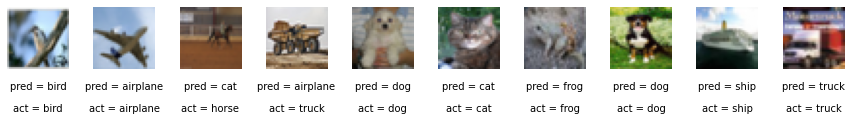

In [48]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), color='black', fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), color='black', fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)